# Quiz
* 다음 데이터셋(loan-train.csv)을 분석하여 loan-test.csv(새롭게 저장된 파일이면 새로운 파일에 넣으시오)데이터의 레이블을 구하시오
* Dream Housing Finance 회사는 모든 주택 융자를 취급합니다. 그들은 모든 도시, 중도시 및 농촌 지역에 존재합니다.
* 해당 회사가 고객의 대출 자격을 확인한 후 주택 대출을 고객에게 해준다.
* 고객은 지원 양식을 작성하는 동안 회사는 고객 세부 정보를 기반으로 대출 자격 프로세스(실시간)를 자동화하려고 합니다.
* 이러한 세부 정보는 성별, 결혼 여부, 교육, 부양 가족 수, 소득, 대출 금액, 신용 기록 등 입니다.
* 특정 고객이 각각의 값을 입력했을 경우 대출이 되는지 안되는지 자동화를 진행하고자 한다. 

### 1. 결측치를 해결하시오
* 결측치 치환
    * Gender : Male 또는 Female
    * Married : Yes, No
    * Dependents : 최빈값, '3+'는 3으로 변경
    * Self_Employed : 이전값
    * LoanAmount : 이후값
    * Loan_Amount_Term : 평균값
    * Creadit_History : 1.0, 0.0
 
### 2. 문자열 데이터 처리
* 참고
    * 타입 확인 : df.dtypes
    * 문자열 숫자 변환 : df['컬럼'] = pd.to_numeric(df['컬럼'])

### 3. 이상치를 해결하시오
* 최빈값으로 치환하세요 (이상치가 없다고 판단되면 변경하지 않아도 된다.)

### 4. 중복데이터를 해결하시오 

* -------- 모델평가는 같이 진행합니다 --------
1. 모델평가
2. 최적의 모델을 이용하여 test.cvs 파일에 결과값(Loan_Status(대출): 승인, 거절)을 넣으시오

In [ ]:
# 데이터 불러오기 (loan-train.csv)

In [2]:
import pandas as pd
df = pd.read_csv('../data_set/2.데이터 클린징/loan-train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### 결측치 확인

In [ ]:
# 행, 열의 개수 및 결측치 확인

In [3]:
print(df.shape)
df.isnull().sum()

(614, 13)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 1. 결측치 치환
    * Gender : Male 또는 Female
    * Married : Yes, No
    * Dependents : 최빈값, '3+'는 3으로 변경
    * Self_Employed : 이전값
    * LoanAmount : 이후값
    * Loan_Amount_Term : 평균값
    * Creadit_History : 1.0, 0.0

In [ ]:
# Gender '치환 전 값' 확인한 후 '치환 후 값' 확인 

In [4]:
print("치환 전 : ",df['Gender'].unique())

df['Gender'] = df['Gender'].fillna('Female')
print("치환 후 : ",df['Gender'].unique())

치환 전 :  ['Male' 'Female' nan]
치환 후 :  ['Male' 'Female']


In [ ]:
# Married '치환 전 값' 확인한 후 '치환 후 값' 확인 

In [5]:
print("치환 전 : ",df['Married'].unique())

df['Married'] = df['Married'].fillna('No')
print("치환 후 : ",df['Married'].unique())

치환 전 :  ['No' 'Yes' nan]
치환 후 :  ['No' 'Yes']


In [ ]:
# Dependents '치환 전 값' 확인한 후 '치환 후 값' 확인 

In [6]:
print("치환 전 : ",df['Dependents'].unique())

df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df.replace(to_replace='3+', value='3', inplace=True)
print("치환 후 : ",df['Dependents'].unique())

치환 전 :  ['0' '1' '2' '3+' nan]
치환 후 :  ['0' '1' '2' '3']


In [ ]:
# Self_Employed '치환 전 값' 확인한 후 '치환 후 값' 확인 

In [7]:
print("치환 전 : ",df['Self_Employed'].unique())

df['Self_Employed'] = df['Self_Employed'].fillna(method='pad')
print("치환 후 : ",df['Self_Employed'].unique())

치환 전 :  ['No' 'Yes' nan]
치환 후 :  ['No' 'Yes']


C:\Users\user\AppData\Local\Temp\ipykernel_7200\3436282765.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Self_Employed'] = df['Self_Employed'].fillna(method='pad')


In [ ]:
# LoanAmount '치환 전 값' 확인한 후 '치환 후 값' 확인 

In [8]:
print("치환 전 : ",df['LoanAmount'].unique())

df['LoanAmount'] = df['LoanAmount'].fillna(method='bfill')
print("치환 후 : ",df['LoanAmount'].unique())

치환 전 :  [ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 230.  86. 234. 246. 500. 186. 119. 107. 209. 208. 243.
  40. 250. 311. 400. 161. 196. 324. 157. 145. 181.  26. 211.   9. 205

C:\Users\user\AppData\Local\Temp\ipykernel_7200\1188303648.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['LoanAmount'] = df['LoanAmount'].fillna(method='bfill')


In [ ]:
# Loan_Amount_Term '치환 전 값' 확인한 후 '치환 후 값' 확인 

In [9]:
print("치환 전 : ",df['Loan_Amount_Term'].unique())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
print("치환 후 : ",df['Loan_Amount_Term'].unique())

치환 전 :  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
치환 후 :  [360. 120. 240. 342. 180.  60. 300. 480.  36.  84.  12.]


In [ ]:
# Credit_History '치환 전 값' 확인한 후 '치환 후 값' 확인 

In [10]:
print("치환 전 : ",df['Credit_History'].unique())

df['Credit_History'] = df['Credit_History'].fillna(1.0)
print("치환 후 : ",df['Credit_History'].unique())

치환 전 :  [ 1.  0. nan]
치환 후 :  [1. 0.]


In [ ]:
# 최종 결과 확인

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

* 결측값 처리 함수화

In [ ]:
# 데이터 불러오기 

In [12]:
import pandas as pd
df = pd.read_csv('../data_set/2.데이터 클린징/loan-train.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
# 모든 컬럼 확인

In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# 모든 결측 값 확인

In [14]:
index = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
for i in index:
    print(i, " => ", df[i].unique())

Loan_ID  =>  ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP0

In [ ]:
# 결측치 변경하는 함수를 만들어 결측치 치환

In [15]:
def nanChange(col):
    for dic in col:
        for k, v in dic.items():
            if k == 'Self_Employed' :
                df[k].fillna(method='pad', inplace=True)
            elif k == 'LoanAmount' :
                df[k].fillna(method='bfill', inplace=True)
            else :
                df[k].fillna(v, inplace=True)
col = [ {'Gender':'Female'}, {'Married':'No'}, {'Dependents': df['Dependents'].mode()[0]}, {'Self_Employed' :df['Self_Employed'].fillna(method='pad')},
          {'LoanAmount' :df['LoanAmount'].fillna(method='bfill') }, {'Loan_Amount_Term':df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())},
          {'Credit_History':df['Credit_History'].fillna(1.0)} ]
df.replace(to_replace='3+', value='3', inplace=True)
nanChange(col)

C:\Users\user\AppData\Local\Temp\ipykernel_7200\1689902709.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  col = [ {'Gender':'Female'}, {'Married':'No'}, {'Dependents': df['Dependents'].mode()[0]}, {'Self_Employed' :df['Self_Employed'].fillna(method='pad')},
C:\Users\user\AppData\Local\Temp\ipykernel_7200\1689902709.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  {'LoanAmount' :df['LoanAmount'].fillna(method='bfill') }, {'Loan_Amount_Term':df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())},
C:\Users\user\AppData\Local\Temp\ipykernel_7200\1689902709.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[k].fillna(method='pad', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7200\1689902709.py:7:

In [ ]:
# 최종 결과 확인

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# 아래 문자열 치환과 비교하기 위해 출력

In [17]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### 2. 문자열 데이터 처리
* 참고
    * 타입 확인 : df.dtypes
    * 문자열 숫자 변환 : df['컬럼'] = pd.to_numeric(df['컬럼'])

In [ ]:
# 각 컬럼이 가지고 있는 값들의 자료형 확인

In [18]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# 위에서 출력된 자료형과 비교

In [19]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y


In [ ]:
# 위의 결과에서 숫자형 문자인 컬럼의 유일한 값 출력

In [20]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [ ]:
# 문자열 숫자를 가지고 있는 값을 숫자로 변경 후 확인

In [21]:
df['Dependents'] = df['Dependents'].apply(pd.to_numeric)
df['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [ ]:
# 성별(Gender)은 Male:0, Female:1 로 변경하여 새로운 컬럼 Gender_int 에 저장 후 확인

In [22]:
items = {'Male':0, 'Female':1}
df['Gender_int'] = df['Gender'].map(items)
df[['Gender', 'Gender_int']]

,Gender,Gender_int
0,Male,0
1,Male,0
2,Male,0
3,Male,0
4,Male,0
...,...,...
609,Female,1
610,Male,0
611,Male,0
612,Male,0


In [ ]:
# 특정 컬럼의 값이 문자열인지 확인

In [25]:
print(type(df['Gender'][0])==str)

True


In [ ]:
# 나머지 문자열들은 자기 자신의 컬럼 위치에 숫자로 변환 (LabelEncoder 사용)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if type(df[column][0]) == str:
        df[column] = le.fit_transform(df[column])

In [ ]:
# 숫자로 변환 결과 type 확인

In [27]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
Gender_int             int64
dtype: object

### 3. 이상치를 해결하시오
* 최빈값으로 치환하세요
* 이상치가 없다고 판단되면 변경하지 않아도 된다.

In [ ]:
# 통계값 확인

In [28]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_int
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.796417,0.648208,0.744300,0.218241,0.140065,5403.459283,1621.245798,146.416938,342.000000,0.855049,1.037459,0.687296,0.203583
std,177.390811,0.402991,0.477919,1.009623,0.413389,0.347338,6109.041673,2926.248369,84.917398,64.372489,0.352339,0.787482,0.463973,0.402991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,0.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,166.750000,360.000000,1.000000,2.000000,1.000000,0.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000,1.000000


In [ ]:
# 1사분위와 3사분위의 값을 각각 구해 딕셔너리에 저장 후 출력

In [30]:
# 아이디는 이상치 값을 따로 구할 필요가 없다. 
q1 = {}
q3 = {}

for key in df.columns:
    if key != 'Loan_ID':
        q1[key] = df[key].describe().loc['25%'] # 1사분위
        q3[key] = df[key].describe().loc['75%'] # 3사분위
print("q1 : ",q1)
print("q3 : ",q3)

# 위의 내용을 한 눈에 보기 위해 데이터 프레임으로 만들기 
df_test = pd.DataFrame([q1, q3], index=['1사분위', '3사분위'])
df_test.T

q1 :  {'Gender': 1.0, 'Married': 0.0, 'Dependents': 0.0, 'Education': 0.0, 'Self_Employed': 0.0, 'ApplicantIncome': 2877.5, 'CoapplicantIncome': 0.0, 'LoanAmount': 100.0, 'Loan_Amount_Term': 360.0, 'Credit_History': 1.0, 'Property_Area': 0.0, 'Loan_Status': 0.0, 'Gender_int': 0.0}
q3 :  {'Gender': 1.0, 'Married': 1.0, 'Dependents': 1.0, 'Education': 0.0, 'Self_Employed': 0.0, 'ApplicantIncome': 5795.0, 'CoapplicantIncome': 2297.25, 'LoanAmount': 166.75, 'Loan_Amount_Term': 360.0, 'Credit_History': 1.0, 'Property_Area': 2.0, 'Loan_Status': 1.0, 'Gender_int': 0.0}


,1사분위,3사분위
Gender,1.0,1.00
Married,0.0,1.00
Dependents,0.0,1.00
Education,0.0,0.00
Self_Employed,0.0,0.00
ApplicantIncome,2877.5,5795.00
CoapplicantIncome,0.0,2297.25
LoanAmount,100.0,166.75
Loan_Amount_Term,360.0,360.00
Credit_History,1.0,1.00


In [ ]:
# 아이디를 제외한 값들의 boxplot 확인

Gender [1 0]
Gender


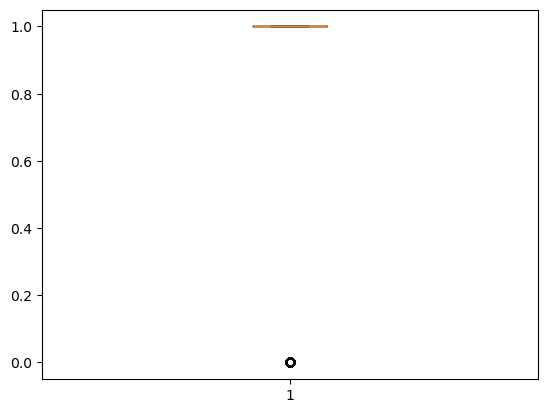

Married [0 1]
Married


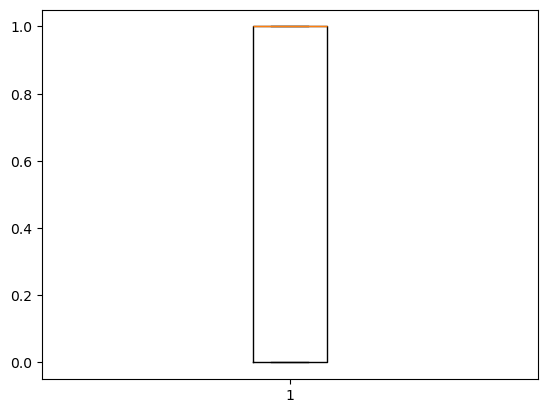

Dependents [0 1 2 3]
Dependents


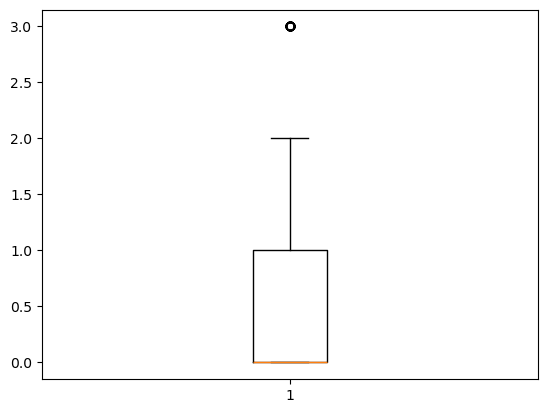

Education [0 1]
Education


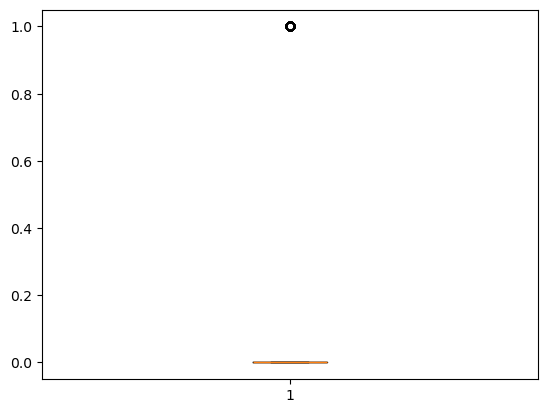

Self_Employed [0 1]
Self_Employed


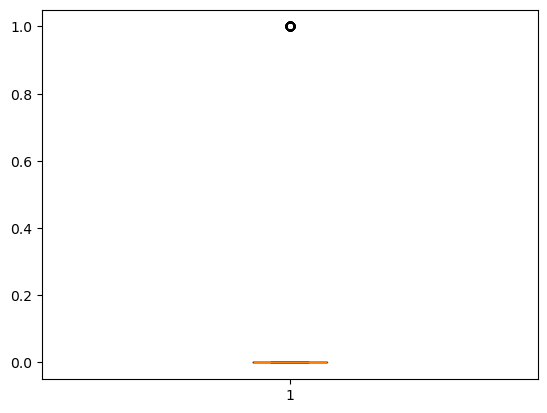

ApplicantIncome [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  9538  2980  1863  7933  3089  4167
  9323  3707  2439  2237  8000  1820 51763  3522  5708  4344  3497  2045
  5516  6400  1916  4600 33846  362

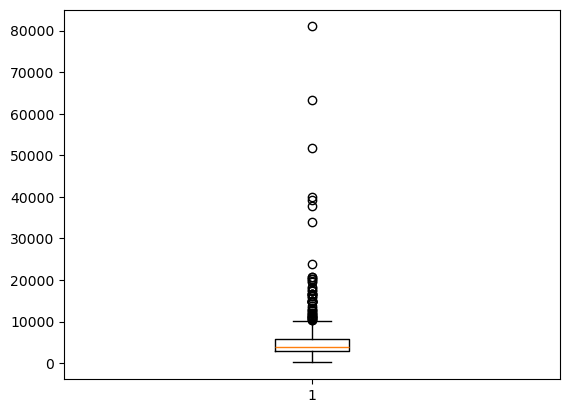

CoapplicantIncome [0.00000000e+00 1.50800000e+03 2.35800000e+03 4.19600000e+03
 1.51600000e+03 2.50400000e+03 1.52600000e+03 1.09680000e+04
 7.00000000e+02 1.84000000e+03 8.10600000e+03 2.84000000e+03
 1.08600000e+03 3.50000000e+03 5.62500000e+03 1.91100000e+03
 1.91700000e+03 2.92500000e+03 2.25300000e+03 1.04000000e+03
 2.08300000e+03 3.36900000e+03 1.66700000e+03 3.00000000e+03
 2.06700000e+03 1.33000000e+03 1.45900000e+03 7.21000000e+03
 1.66800000e+03 1.21300000e+03 2.33600000e+03 3.44000000e+03
 2.27500000e+03 1.64400000e+03 1.16700000e+03 1.59100000e+03
 2.20000000e+03 2.25000000e+03 2.85900000e+03 3.79600000e+03
 3.44900000e+03 4.59500000e+03 2.25400000e+03 3.06600000e+03
 1.87500000e+03 1.77400000e+03 4.75000000e+03 3.02200000e+03
 4.00000000e+03 2.16600000e+03 1.88100000e+03 2.53100000e+03
 2.00000000e+03 2.11800000e+03 4.16700000e+03 2.90000000e+03
 5.65400000e+03 1.82000000e+03 2.30200000e+03 9.97000000e+02
 3.54100000e+03 3.26300000e+03 3.80600000e+03 3.58300000e+03
 7.540

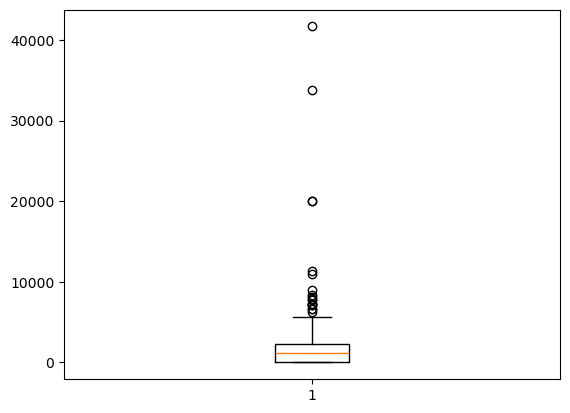

LoanAmount [128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.  17.
 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.  35.
 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44. 286.
  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113. 176.
 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225. 216.
  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650. 102.
 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.  87.
 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166. 124.
  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123. 279.
 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.  56.
 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380. 296.
 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190. 149.
 153. 162. 230.  86. 234. 246. 500. 186. 119. 107. 209. 208. 243.  40.
 250. 311. 400. 161. 196. 324. 157. 145. 181.  26. 211.   9. 205. 

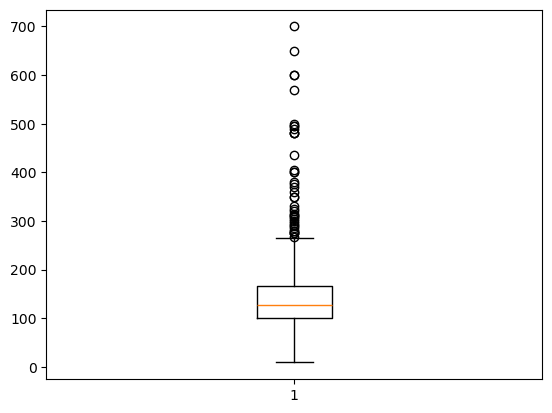

Loan_Amount_Term [360. 120. 240. 342. 180.  60. 300. 480.  36.  84.  12.]
Loan_Amount_Term


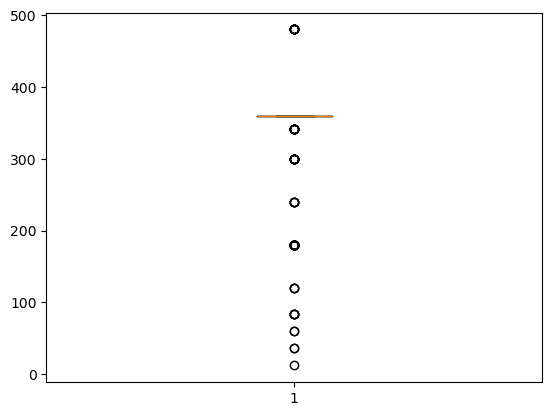

Credit_History [1. 0.]
Credit_History


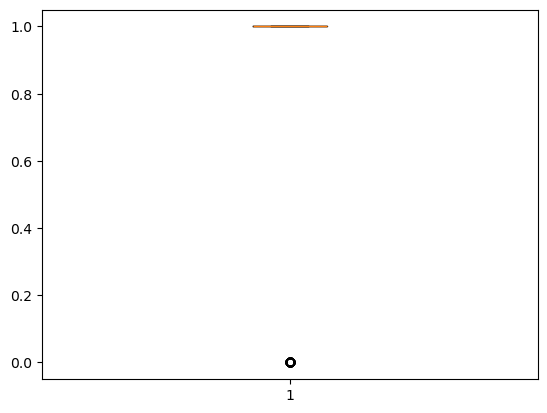

Property_Area [2 0 1]
Property_Area


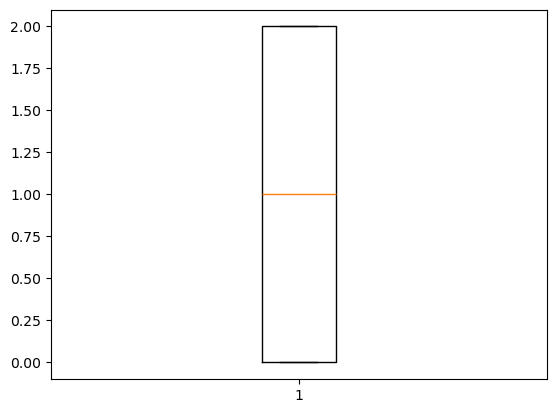

Loan_Status [1 0]
Loan_Status


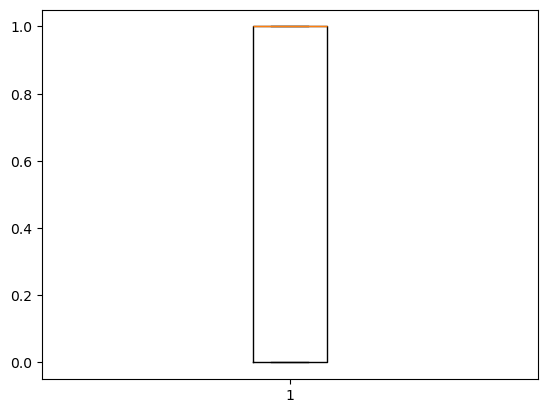

Gender_int [0 1]
Gender_int


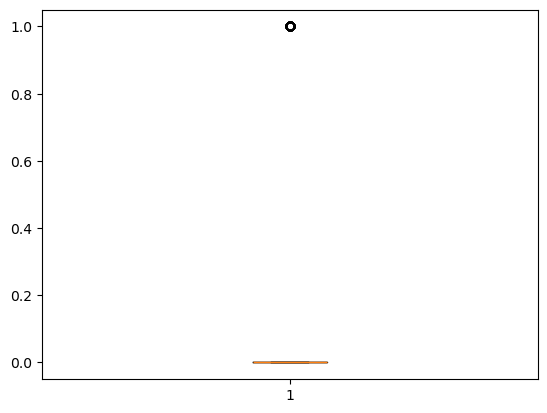

In [32]:
import matplotlib.pyplot as plt
for column in df.columns:
    if column != 'Loan_ID':
        print(column, df[column].unique())
        print(column)
        plt.boxplot(df[column])
        plt.show()

# 결과 확인
# 이상치가 보이는 것들을 보면 0, 1 둘 중 하나이기 때문에 이상치라 보기 어렵다. 문제있어 보이는 것은 없다. 

### 4. 중복데이터를 해결하시오

In [ ]:
# 중복데이터 확인

In [33]:
df.duplicated().sum()

0

### cleaning 데이터 저장

In [ ]:
# df.to_csv('../data_set/2.데이터 클린징/loan_train_cleaning.csv', index=False)

In [34]:
df.to_csv('../data_set/2.데이터 클린징/loan_train_cleaning.csv', index=False)